In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import scipy.stats as sci
from sklearn.metrics import accuracy_score

In [329]:
pokemon = pd.read_csv('Data/ML_PokeData.csv')
combats = pd.read_csv('Data/combats.csv')

In [330]:
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Ability__Intimidate,Ability__Keen Eye,Ability__Levitate,Ability__Other,Ability__Overgrow,Ability__Pressure,Ability__Sturdy,Ability__Swarm,Ability__Swift Swim,Ability__Torrent
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0


In [331]:
cols = ["First_pokemon","Second_pokemon","Winner"]
new_combat_data=combats[cols].replace(pokemon.name)
new_combat_data.head()

,First_pokemon,Second_pokemon,Winner
0,Beautifly,Nosepass,Nosepass
1,Carbink,Dedenne,Dedenne
2,Sunflora,Flabébé,Flabébé
3,Smoochum,Swirlix,Swirlix
4,Chikorita,Donphan,Chikorita


In [332]:
new_combat_data.Winner.value_counts()

Noctowl      152
Mime Jr.     136
Cyndaquil    136
Mismagius    134
Roselia      133
            ... 
Duosion        5
Smoochum       4
Virizion       4
Ninjask        3
Sunkern        3
Name: Winner, Length: 783, dtype: int64

In [333]:
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

In [334]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [335]:
pokemon.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth', 'hp',
       'name', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
       'generation', 'is_legendary', 'Type1_bug', 'Type1_dark', 'Type1_dragon',
       'Type1_electric', 'Type1_fairy', 'Type1_fighting', 'Type1_fire',
       'Type1_flying', 'Type1_ghost', 'Type1_grass', 'Type1_ground',
       'Type1_ice', 'Type1_normal', 'Type1_poison', 'Type1_psychic',
       'Type1_rock', 'Type1_steel', 'Type1_water', 'Type2_None', 'Type2_bug',
       'Type2_dark', 'Type2_dragon', 'Type2_electric', 'Type2_fairy',
       'Type2_fighting', 'Type2_fire', 'Type

In [336]:
def normalization(data_df):
    stats=['against_bug', 'against_dark', 'against_dragon', 'against_electric','against_fairy', 'against_fight', 'against_fire', 'against_flying','against_ghost', 'against_grass', 'against_ground', 'against_ice','against_normal', 'against_poison', 'against_psychic', 'against_rock','against_steel', 'against_water', 'attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed','Type1_bug', 'Type1_dark', 'Type1_dragon',
       'Type1_electric', 'Type1_fairy', 'Type1_fighting', 'Type1_fire',
       'Type1_flying', 'Type1_ghost', 'Type1_grass', 'Type1_ground',
       'Type1_ice', 'Type1_normal', 'Type1_poison', 'Type1_psychic',
       'Type1_rock', 'Type1_steel', 'Type1_water', 'Type2_None', 'Type2_bug',
       'Type2_dark', 'Type2_dragon', 'Type2_electric', 'Type2_fairy',
       'Type2_fighting', 'Type2_fire', 'Type2_flying', 'Type2_ghost',
       'Type2_grass', 'Type2_ground', 'Type2_ice', 'Type2_normal',
       'Type2_poison', 'Type2_psychic', 'Type2_rock', 'Type2_steel',
       'Type2_water','Abilities_Counts', 'Ability__Blaze','Ability__Chlorophyll', 'Ability__Intimidate', 'Ability__Keen Eye','Ability__Levitate', 'Ability__Other', 'Ability__Overgrow','Ability__Pressure', 'Ability__Sturdy', 'Ability__Swarm','Ability__Swift Swim', 'Ability__Torrent']
    stats_df=pokemon[stats].T.to_dict("list")
    one=data_df.First_pokemon.map(stats_df)
    two=data_df.Second_pokemon.map(stats_df)
    temp_list=[]
    for i in range(len(one)):
        temp_list.append(np.array(one[i])-np.array(two[i]))
    new_test = pd.DataFrame(temp_list, columns=stats)
    for c in stats:
        description=new_test[c].describe()
        new_test[c]=(new_test[c]-description['min'])/(description['max']-description['min'])
    return new_test

In [337]:
data=normalization(combats)
data = pd.concat([data,combats.Winner], axis=1)

In [338]:
data.head(100)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Ability__Keen Eye,Ability__Levitate,Ability__Other,Ability__Overgrow,Ability__Pressure,Ability__Sturdy,Ability__Swarm,Ability__Swift Swim,Ability__Torrent,Winner
0,0.433333,0.517241,0.500,0.6250,0.482759,0.28125,0.700000,0.700000,0.500,0.266667,...,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.5,0.5,1
1,0.500000,0.517241,0.500,0.5625,0.482759,0.56250,0.433333,0.500000,0.500,0.633333,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
2,0.700000,0.586207,0.750,0.4375,0.482759,0.56250,0.633333,0.633333,0.500,0.433333,...,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,1
3,0.700000,0.724138,0.750,0.5000,0.482759,0.56250,0.633333,0.500000,0.625,0.500000,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
4,0.633333,0.517241,0.500,0.5625,0.482759,0.50000,0.633333,0.633333,0.500,0.300000,...,0.5,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.566667,0.724138,0.625,0.5625,0.413793,0.56250,0.633333,0.500000,0.625,0.433333,...,0.5,1.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,1
96,0.500000,0.517241,0.500,0.6250,0.482759,0.68750,0.266667,0.300000,0.500,0.966667,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
97,0.500000,0.655172,0.375,0.5625,0.413793,0.50000,0.633333,0.500000,0.625,0.433333,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
98,0.500000,0.517241,0.500,0.3125,0.482759,0.50000,0.566667,0.433333,0.500,0.366667,...,0.5,0.5,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0


In [339]:
x_label=data.drop("Winner",axis=1)
y_label=data["Winner"]

In [340]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.20, random_state=42)

TRAINING SET METRICS
[[18840     8]
 [    1 21151]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18848
           1       1.00      1.00      1.00     21152

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


TESTING SET METRICS
[[2836 1917]
 [1401 3846]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      4753
           1       0.67      0.73      0.70      5247

    accuracy                           0.67     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.67      0.67     10000



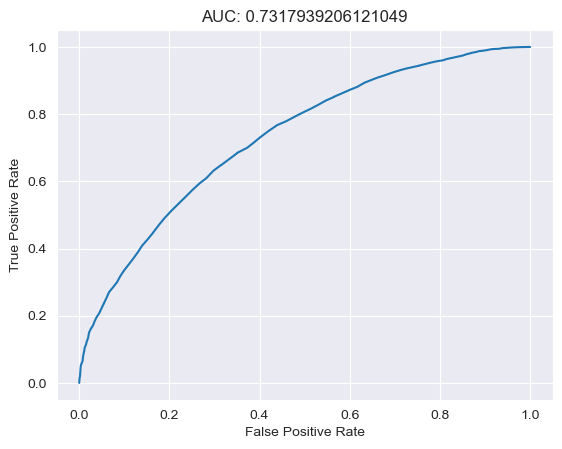

In [353]:
clf = RandomForestClassifier(n_estimators=125)
doMLClassification(clf, x_train, y_train, x_test, y_test)

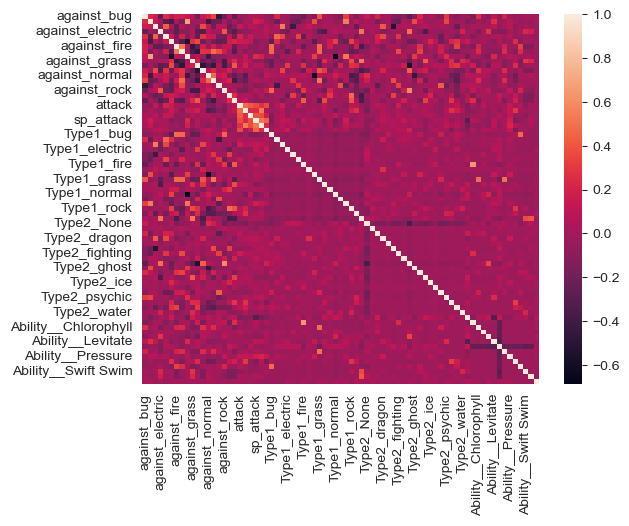

<Figure size 3000x2000 with 0 Axes>

In [365]:
corrs = data.corr()
sns.heatmap(corrs)
plt.figure(figsize=(30,20), dpi=100)
plt.show()

In [372]:
(corrs.any()>0.9).value_counts()

True    75
dtype: int64

In [344]:
abs(corrs["Winner"]).sort_values(ascending=False)

Winner                 1.000000
Type1_steel            0.071220
Abilities_Counts       0.058294
Ability__Intimidate    0.050519
Ability__Torrent       0.049271
                         ...   
Type2_ghost            0.001644
Type2_dark             0.001176
Type2_water            0.000839
Ability__Overgrow      0.000639
Type1_poison           0.000469
Name: Winner, Length: 75, dtype: float64

TRAINING SET METRICS
[[18848     0]
 [    9 21143]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18848
           1       1.00      1.00      1.00     21152

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


TESTING SET METRICS
[[2875 1878]
 [1692 3555]]
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      4753
           1       0.65      0.68      0.67      5247

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



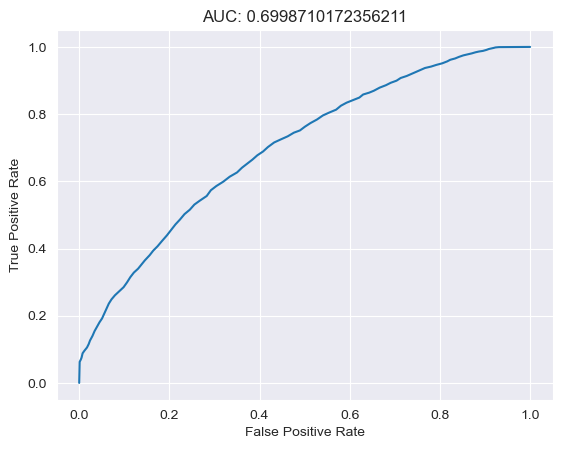

In [345]:
ext = ExtraTreesClassifier(n_estimators=100)
doMLClassification(ext, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[11587  7261]
 [ 5325 15827]]
              precision    recall  f1-score   support

           0       0.69      0.61      0.65     18848
           1       0.69      0.75      0.72     21152

    accuracy                           0.69     40000
   macro avg       0.69      0.68      0.68     40000
weighted avg       0.69      0.69      0.68     40000


TESTING SET METRICS
[[2551 2202]
 [1676 3571]]
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      4753
           1       0.62      0.68      0.65      5247

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



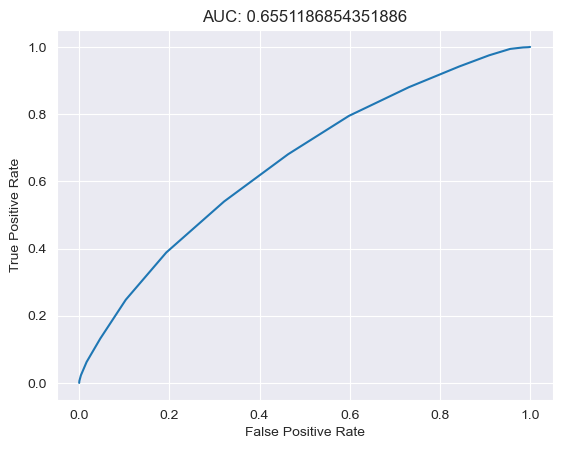

In [346]:
knn = KNeighborsClassifier(n_neighbors=15)
doMLClassification(knn, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[18848     0]
 [    9 21143]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18848
           1       1.00      1.00      1.00     21152

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


TESTING SET METRICS
[[2694 2059]
 [1979 3268]]
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      4753
           1       0.61      0.62      0.62      5247

    accuracy                           0.60     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.60      0.60      0.60     10000



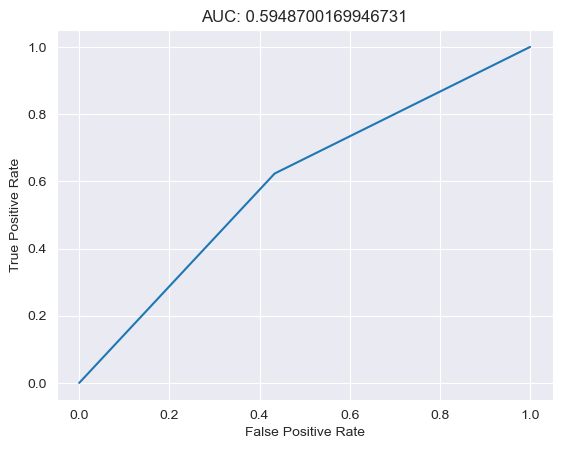

In [347]:
dt = DecisionTreeClassifier(random_state=42)
doMLClassification(dt, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[ 8273 10575]
 [ 5710 15442]]
              precision    recall  f1-score   support

           0       0.59      0.44      0.50     18848
           1       0.59      0.73      0.65     21152

    accuracy                           0.59     40000
   macro avg       0.59      0.58      0.58     40000
weighted avg       0.59      0.59      0.58     40000


TESTING SET METRICS
[[2071 2682]
 [1519 3728]]
              precision    recall  f1-score   support

           0       0.58      0.44      0.50      4753
           1       0.58      0.71      0.64      5247

    accuracy                           0.58     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.58      0.57     10000



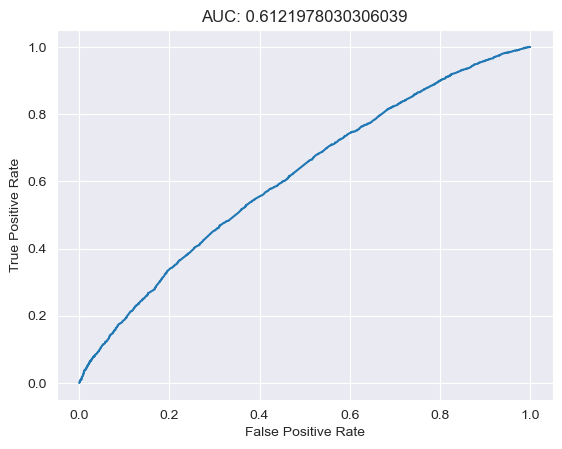

In [348]:
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[18848     0]
 [    9 21143]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18848
           1       1.00      1.00      1.00     21152

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


TESTING SET METRICS
[[2862 1891]
 [1676 3571]]
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      4753
           1       0.65      0.68      0.67      5247

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



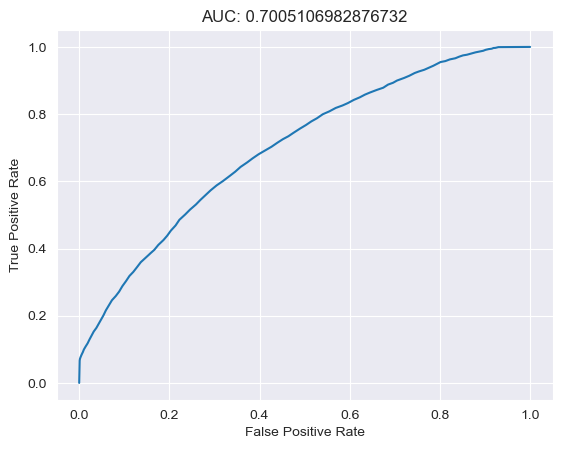

In [349]:
et = ExtraTreesClassifier(random_state=42)
doMLClassification(et, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[ 7909 10939]
 [ 4195 16957]]
              precision    recall  f1-score   support

           0       0.65      0.42      0.51     18848
           1       0.61      0.80      0.69     21152

    accuracy                           0.62     40000
   macro avg       0.63      0.61      0.60     40000
weighted avg       0.63      0.62      0.61     40000


TESTING SET METRICS
[[1866 2887]
 [1128 4119]]
              precision    recall  f1-score   support

           0       0.62      0.39      0.48      4753
           1       0.59      0.79      0.67      5247

    accuracy                           0.60     10000
   macro avg       0.61      0.59      0.58     10000
weighted avg       0.60      0.60      0.58     10000



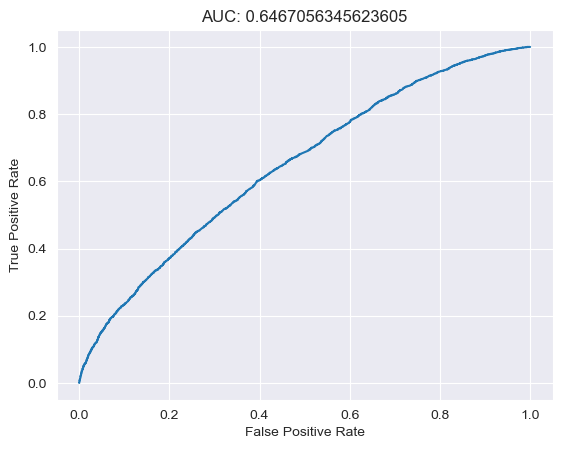

In [350]:
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[13335  5513]
 [ 3510 17642]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75     18848
           1       0.76      0.83      0.80     21152

    accuracy                           0.77     40000
   macro avg       0.78      0.77      0.77     40000
weighted avg       0.78      0.77      0.77     40000


TESTING SET METRICS
[[2761 1992]
 [1413 3834]]
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      4753
           1       0.66      0.73      0.69      5247

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



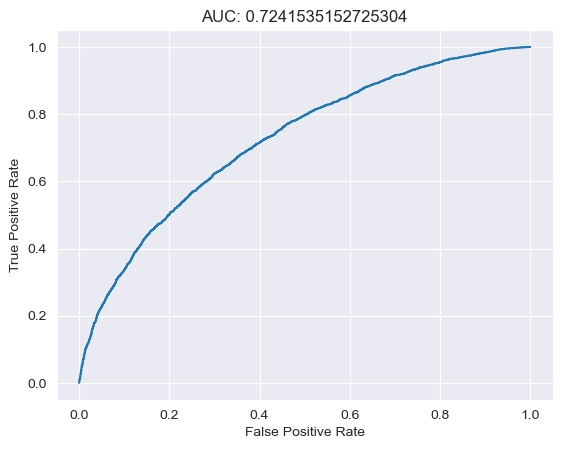

In [351]:
xgb = XGBClassifier(random_state=42, n_estimators=100)
doMLClassification(xgb, x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21152, number of negative: 18848
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528800 -> initscore=0.115328
[LightGBM] [Info] Start training from score 0.115328
TRAINING SET METRICS
[[11319  7529]
 [ 4027 17125]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66     18848
           1       0.69      0.81      0.75     21152

    accuracy                           0.71     40000
   macro avg       0.72      0.71      0.70     40000
weighted avg       0.71      0.71    

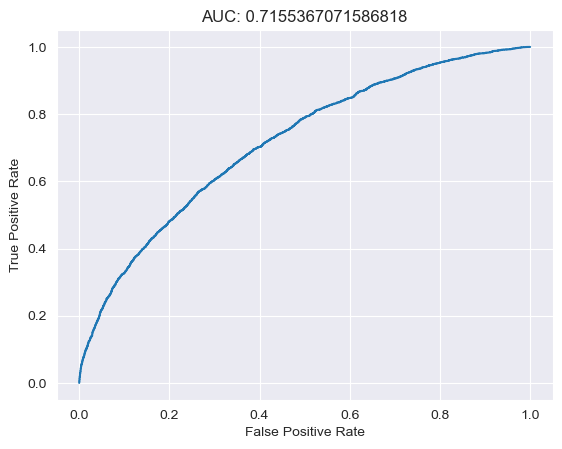

In [352]:
lgb = LGBMClassifier(random_state=42, n_estimators=100)
doMLClassification(lgb, x_train, y_train, x_test, y_test)

In [373]:
test_data = pd.read_csv('Data/tests.csv')
new_test_data=test_data[["First_pokemon","Second_pokemon"]].replace(pokemon.name)
new_test_data.head()

,First_pokemon,Second_pokemon
0,Gyarados,Goldeen
1,Fletchling,Scizor
2,Klefki,Horsea
3,Espeon,Mienfoo
4,Sandslash,Frogadier


In [357]:
lgbModel = lgb.fit(x_train,y_train)

finalTest = normalization(test_data)
pred = lgbModel.predict(finalTest)
test_data["Winner"]=[test_data["First_pokemon"][i] if pred[i]==0 else test_data["Second_pokemon"][i] for i in range(len(pred))]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21152, number of negative: 18848
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528800 -> initscore=0.115328
[LightGBM] [Info] Start training from score 0.115328


In [360]:
combats_name = test_data[cols].replace(pokemon.name)
combats_name.head(25)

,First_pokemon,Second_pokemon,Winner
0,Gyarados,Goldeen,Goldeen
1,Fletchling,Scizor,Scizor
2,Klefki,Horsea,Klefki
3,Espeon,Mienfoo,Mienfoo
4,Sandslash,Frogadier,Frogadier
5,Pinsir,Remoraid,Remoraid
6,Bronzong,Steelix,Steelix
7,Mr. Mime,Vulpix,Mr. Mime
8,Chinchou,Volcarona,Chinchou
9,Mawile,Barbaracle,Mawile


In [374]:
xgbModel = xgb.fit(x_train,y_train)

finalTest = normalization(test_data)
pred = xgbModel.predict(finalTest)
test_data["Winner"]=[test_data["First_pokemon"][i] if pred[i]==0 else test_data["Second_pokemon"][i] for i in range(len(pred))]

In [376]:
combats_name = test_data[cols].replace(pokemon.name)
combats_name.head(50)

,First_pokemon,Second_pokemon,Winner
0,Gyarados,Goldeen,Gyarados
1,Fletchling,Scizor,Fletchling
2,Klefki,Horsea,Klefki
3,Espeon,Mienfoo,Mienfoo
4,Sandslash,Frogadier,Frogadier
5,Pinsir,Remoraid,Remoraid
6,Bronzong,Steelix,Bronzong
7,Mr. Mime,Vulpix,Mr. Mime
8,Chinchou,Volcarona,Chinchou
9,Mawile,Barbaracle,Mawile
